## 神經元件
- Layers : Neural Network ( Neural Network & Model )
- input data & targets : Training Data & Validation Data for Neural Netwrk
- Loss Funtion : Learning Rate
- Optimizer : Learning Method

## 需要轉 Numpy

In [1]:
from keras.datasets import imdb
import keras
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # 限制維度大小, 剔除生硬字

# restore np.load for future normal usage
np.load = np_load_old

Using TensorFlow backend.


In [2]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [3]:
# 如果 Result == 1 表示 " 正面 " , Result == 0 表示 " 負面 "
print(train_labels[0])

1


In [4]:
print(train_labels[1])

0


## 找出 train_data 內, 最大的number, 確認 num_words 參數 


### List Comprehensions, 搭配兩次 max( ) 找出 train_data => max number  

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
# 取單字(鍵), 對應數字(值) 的 字典
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ''.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
word_index['a']

3

In [8]:
word_index['the']

1

In [9]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

## 將2層 int list 編碼成 '二元矩陣' 

In [10]:
def vectorize_sequences(sequences, dimension = 10000): # 預設 10000 種單字, One-Hot 編碼
    results = np.zeros((len(sequences), dimension))
    # 建立全為 0 之矩陣, Shape 為 (len(sequences), dimension)
    # len(sequences) => 樣本
    # dimension      => 數量
    
    for i, sequences in enumerate(sequences):
    # enumerate() => 為其子串列編號, '編號' 儲存到 i, '子串列' 儲存到 sequences
        
        results[i, sequences] = 1.
        # results[i, sequences] 中多個元素, 以 sequences 串列的每個元素值為索引, 設為 1.0
    return results

In [11]:
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

# 將 List 轉為 1D(維) 陣列
y_train = np.asanyarray(train_labels).astype('float32') # train labels 向量化
y_test  = np.asanyarray(test_labels).astype('float32')  # test labels  向量化

In [12]:
array = np.zeros((2, 4))
print('ndim階數:' , array.ndim)
print('shape:  ', array.shape)
print('dtype:  ', array.dtype)
print('array:  ', array)

ndim階數: 2
shape:   (2, 4)
dtype:   float64
array:   [[0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [13]:
from keras import layers, models
model = models.Sequential()

W1209 10:39:28.348268 15812 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [14]:
model.add(layers.Dense(16, 
                       activation = 'relu', 
                       input_shape = (10000,))) # input_layers 也算是 hidden layer
model.add(layers.Dense(16, 
                       activation = 'relu'))    # hidden layer
model.add(layers.Dense(1, 
                       activation = 'sigmoid')) # output layer
                       # 因為 Neural Network 輸出為"機率值", 
                       # 所以使用 Sigmoid 結束 Neural Network 
                       # Loss_Function = 'binary_crossentropy' 建議使用
                       # 亦或是 mean_squared_error, 
                       # 但如果是'機率模型', 優選通常為'交叉商', 'Crossentorpy' => 來自 'Information Theory'

# Metrics 設定 Optimizers, Loss = Binary_Crossentropy
# 指定損失函數 並進行 compile()
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

W1209 10:39:28.364224 15812 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1209 10:39:28.367244 15812 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1209 10:39:28.396138 15812 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1209 10:39:28.408140 15812 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1209 10:39:28.412095 15812 deprecation.py:323] From c:\python36\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (fro

#### 調整 Optimizers  

In [15]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr = 0.001), # Optimizer Learning_Rate Value 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

#### 自行定義 loss function, metrics 

In [16]:
from keras import losses, metrics
model.compile(optimizer=optimizers.RMSprop(lr = 0.001), 
              loss=losses.binary_crossentropy,   # 自行定義 loss function 
              metrics=[metrics.binary_accuracy]) # metrics function 

# 驗證 neural network
- 設定驗證 Dataset 

In [17]:
# 取 input data '前10,000筆 ' 做為 'testing data'
x_val = x_train[:10000]

# input data 的 第 ' 10,000筆 '後, 才為 'training data'
partial_x_train = x_train[10000:]

# 取 input labels '前10,000筆 ' 做為 'testing labels'
y_val = y_train[:10000]

# input data 的 第 ' 10,000筆 '後, 才為 'training labels'
partial_y_train = y_train[10000:]

### 訓練模型

In [18]:
model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [19]:
history = model.fit(partial_x_train,                # training data
                    partial_y_train,                # training labels
                    epochs=20,                      # 批次
                    batch_size=128,                 # 512 data/次
                    validation_data=(x_val, y_val)) # 驗證資料, 查看 Loss Function

W1209 10:39:28.764189 15812 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 412us/step - loss: 0.3980 - acc: 0.8407 - val_loss: 0.2830 - val_acc: 0.8883
Epoch 2/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.2100 - acc: 0.9211 - val_loss: 0.2752 - val_acc: 0.8898
Epoch 3/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1505 - acc: 0.9473 - val_loss: 0.3015 - val_acc: 0.8878
Epoch 4/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.1144 - acc: 0.9600 - val_loss: 0.3449 - val_acc: 0.8826
Epoch 5/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.0843 - acc: 0.9713 - val_loss: 0.3834 - val_acc: 0.8781
Epoch 6/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.0622 - acc: 0.9799 - val_loss: 0.4589 - val_acc: 0.8742
Epoch 7/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.0438 - acc: 0.9842 - val_loss: 0.5104 - 

### History. 

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

W1209 10:40:14.699633 15812 legend.py:1282] No handles with labels found to put in legend.


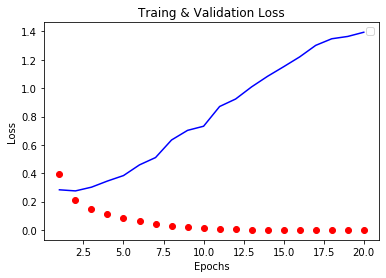

In [22]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1) 
# len(loss_values + 1) 為 0-20 週期, '項目個數'

plt.title('Traing & Validation Loss') # Title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() # 可追加個個輸出圖表之名稱
plt.plot(epochs, loss_values, 'ro', label = 'Training Loss')
# 以 'b' 指定 用藍色(紅色)單點 繪製出 x => 訓練週期, y 軸 為'loss score' 

plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
# 以 'b' 指定 用藍色(紅色)線 繪製出 x => 訓練週期, y 軸 為'loss score' 
plt.show()




### Clear Figure => plt.clf() 

In [23]:
plt.clf()

<Figure size 432x288 with 0 Axes>

### PLT Training accuracy & Validation accuracy 

In [24]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

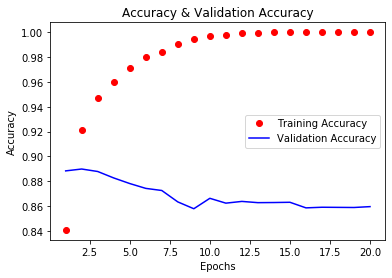

In [25]:
acc     = history_dict['acc']
val_acc = history_dict['val_acc']

plt.title('Accuracy & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'ro', label = 'Training Accuracy')
plt.plot(epochs, val_acc,  'b', label = 'Validation Accuracy')
plt.legend()
plt.show()


###  如上圖 OverFitting 

## 重新 => 訓練模型

In [26]:
from keras import layers, models
model = models.Sequential()
model.add(layers.Dense(units = 32, 
                       activation = 'relu', 
                       input_shape = (10000, )))
model.add(layers.Dense(units = 16, 
                       activation = 'relu'))
model.add(layers.Dense(units = 1, 
                       activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.fit(x_train, 
          y_train, 
          epochs = 4, # 因為從第4週期後, 開始 OverFitting, 所以從第四週期開始 
          batch_size = 128)

results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.3463 - acc: 0.8609
Epoch 2/4
25000/25000 [==============================] - 2s 92us/step - loss: 0.2076 - acc: 0.9219
Epoch 3/4
25000/25000 [==============================] - 2s 92us/step - loss: 0.1669 - acc: 0.9380
Epoch 4/4
25000/25000 [==============================] - 3s 119us/step


In [27]:
print(results)

[0.3758450482702255, 0.86188]


In [28]:
print('Loss Scores:', results[0])

Loss Scores: 0.3758450482702255


In [29]:
print('Accuracy:', results[1])

Accuracy: 0.86188


##  使用訓練完成的模型, 進行預測

In [30]:
model.predict(x_test)

array([[0.07376739],
       [0.9999914 ],
       [0.49731508],
       ...,
       [0.1368078 ],
       [0.03807411],
       [0.44835073]], dtype=float32)

In [31]:
from keras import layers, models
model = models.Sequential()
model.add(layers.Dense(units = 64, 
                       activation = 'relu', 
                       input_shape = (10000, )))
model.add(layers.Dense(units = 32,              # 增加 32 units
                       activation = 'relu'))
model.add(layers.Dense(units = 16, 
                       activation = 'relu'))
model.add(layers.Dense(units = 1, 
                       activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.fit(x_train, 
          y_train, 
          epochs = 4, # 因為從第4週期後, 開始 OverFitting, 所以從第四週期開始 
          batch_size = 128)

results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 127us/step - loss: 0.3545 - acc: 0.8496
Epoch 2/4
25000/25000 [==============================] - 3s 102us/step - loss: 0.1998 - acc: 0.9236
Epoch 3/4
25000/25000 [==============================] - 3s 106us/step - loss: 0.1389 - acc: 0.9485
Epoch 4/4
25000/25000 [==============================] - 3s 115us/step


In [33]:
print(results)
print('Loss Scores:', results[0])
print('Accuracy:', results[1])

[0.4304972583389282, 0.871]
Loss Scores: 0.4304972583389282
Accuracy: 0.871


In [34]:
model.predict(x_test)

array([[0.08369055],
       [0.9999835 ],
       [0.99872327],
       ...,
       [0.09152657],
       [0.0348534 ],
       [0.5489799 ]], dtype=float32)

In [38]:
from keras import layers, models
model = models.Sequential()
model.add(layers.Dense(units = 128, 
                       activation = 'relu', 
                       input_shape = (10000, )))
model.add(layers.Dense(units = 64,              # 增加 32 units
                       activation = 'relu'))
model.add(layers.Dense(units = 32,              # 增加 32 units
                       activation = 'relu'))
model.add(layers.Dense(units = 16, 
                       activation = 'relu'))
model.add(layers.Dense(units = 1, 
                       activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', 
              loss = losses.mse, 
              metrics = ['accuracy'])

model.fit(x_train, 
          y_train, 
          epochs = 4, # 因為從第4週期後, 開始 OverFitting, 所以從第四週期開始 
          batch_size = 512)

results = model.evaluate(x_test, y_test)

print(results)
print('Loss Scores:', results[0])
print('Accuracy:', results[1])

Epoch 1/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.1388 - acc: 0.8032
Epoch 2/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.0721 - acc: 0.9052
Epoch 3/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.0524 - acc: 0.9329
Epoch 4/4
25000/25000 [==============================] - 3s 114us/step
[0.10864305374920369, 0.8616]
Loss Scores: 0.10864305374920369
Accuracy: 0.8616


In [39]:
model.predict(x_test)

array([[0.10595295],
       [0.9995922 ],
       [0.9983776 ],
       ...,
       [0.24437574],
       [0.07696271],
       [0.8245105 ]], dtype=float32)

In [40]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

W1209 10:51:07.037538 15812 legend.py:1282] No handles with labels found to put in legend.


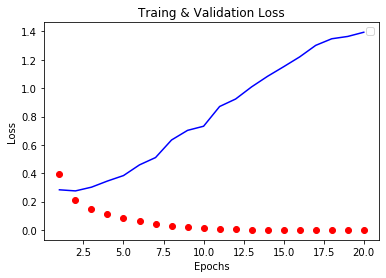

In [42]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1) 
# len(loss_values + 1) 為 0-20 週期, '項目個數'

plt.title('Traing & Validation Loss') # Title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() # 可追加個個輸出圖表之名稱
plt.plot(epochs, loss_values, 'ro', label = 'Training Loss')
# 以 'b' 指定 用藍色(紅色)單點 繪製出 x => 訓練週期, y 軸 為'loss score' 

plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
# 以 'b' 指定 用藍色(紅色)線 繪製出 x => 訓練週期, y 軸 為'loss score' 
plt.show()




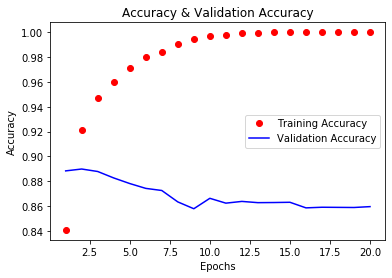

In [43]:
acc     = history_dict['acc']
val_acc = history_dict['val_acc']

plt.title('Accuracy & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'ro', label = 'Training Accuracy')
plt.plot(epochs, val_acc,  'b', label = 'Validation Accuracy')
plt.legend()
plt.show()
